## Ejercicios API Frankfurter

In [1]:
import numpy as np
import pandas as pd
import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import requests

from pprint import pprint

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"sns=={sns.__version__}")
print(f"requests=={requests.__version__}")

numpy==2.2.0
pandas==2.2.3
matplotlib==3.10.0
sns==0.13.2
requests==2.32.3


### Ejercicio 1:

- Definir una función que tome como parámetro un año y una moneda diferente del euro y que muestre la relación entre el euro y la otra moneda en ese año. En la gráfica se debe marcar el máximo y el mínimo. Imprime los endpoints que utilizados para extraer la información.

In [27]:
def cambio(year, coin):
    url = "https://api.frankfurter.app"
    date1 = f"{year}-01-02"
    if year < datetime.now().year:
        date_ = f"{year}-12-31"
        endpoint= f"{url}/{date1}..{date_}?to={coin}"
    else:
        endpoint= f"{url}/{date1}..?to={coin}"
    print(f"Endpoint: {endpoint}")
    response = requests.get(endpoint)
    data = response.json() #convierte  la respuesta json en un dicccionario de python
    pprint(data)
    fechas = list(data["rates"].keys()) # convierte las fechas en cadanas desde el dirccionario rates 
    fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]
    moneda = [data["rates"][fecha][coin] for fecha in data["rates"].keys()]
    plt.figure(figsize=(18, 10))
    plt.plot(fechas, moneda, "-") 
    plt.plot(fechas[np.argmax(moneda)], np.max(moneda), color = "green", marker= "o", markersize= 12)
    plt.plot(fechas[np.argmin(moneda)], np.min(moneda), color = "red", marker= "o", markersize= 12)
    plt.gcf().autofmt_xdate()
    plt.xlabel("Fechas", fontsize=20)
    plt.ylabel(coin, fontsize=20)
    plt.title(f"Relacion EUR - {coin}  Año {year} ", fontsize= 20)
    plt.grid()
    plt.show()
    

Endpoint: https://api.frankfurter.app/2021-01-02..2021-12-31?to=GBP
{'amount': 1.0,
 'base': 'EUR',
 'end_date': '2021-12-31',
 'rates': {'2020-12-31': {'GBP': 0.89903},
           '2021-01-04': {'GBP': 0.9016},
           '2021-01-05': {'GBP': 0.90333},
           '2021-01-06': {'GBP': 0.90635},
           '2021-01-07': {'GBP': 0.9019},
           '2021-01-08': {'GBP': 0.90128},
           '2021-01-11': {'GBP': 0.90235},
           '2021-01-12': {'GBP': 0.8944},
           '2021-01-13': {'GBP': 0.88983},
           '2021-01-14': {'GBP': 0.88943},
           '2021-01-15': {'GBP': 0.88998},
           '2021-01-18': {'GBP': 0.89073},
           '2021-01-19': {'GBP': 0.891},
           '2021-01-20': {'GBP': 0.88563},
           '2021-01-21': {'GBP': 0.88625},
           '2021-01-22': {'GBP': 0.89045},
           '2021-01-25': {'GBP': 0.888},
           '2021-01-26': {'GBP': 0.88698},
           '2021-01-27': {'GBP': 0.88395},
           '2021-01-28': {'GBP': 0.88603},
           '2021-01-

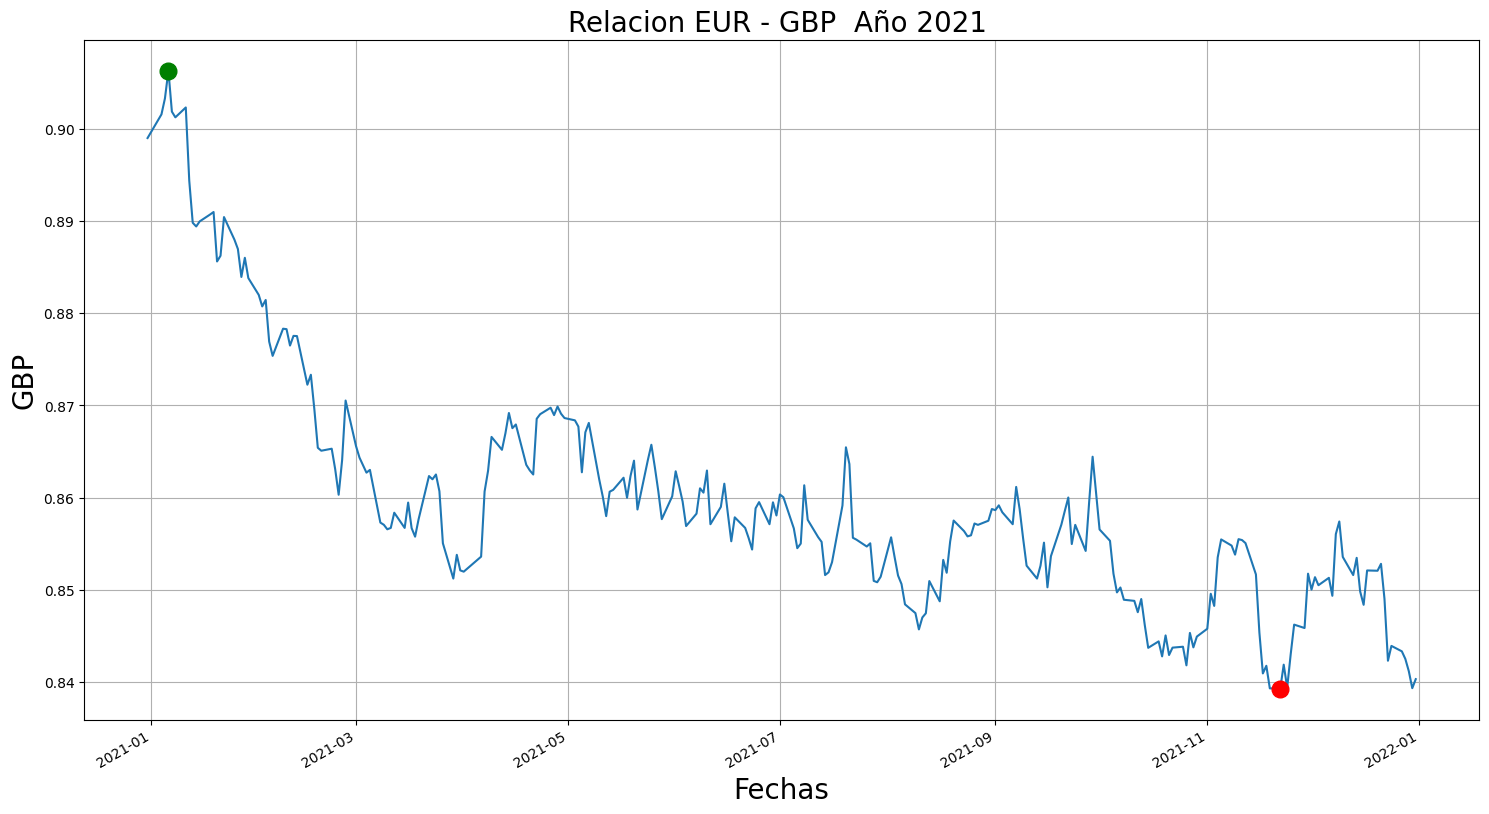

In [28]:
cambio(2021, "GBP")

### Ejercicio 2:

- Repite el ejercicio 1 pero esta vez agregando al mismo plot tantas monedas como el usuario lo indique. Esta vez no hace falta indicar los máximos y mínimos de cada moneda.

### Ejercicio 3:

- Repite el ejercicio 1 esta vez evaluando la relación de dos monedas que no sean el euro. Muestra el máximo y el mínimo de la relación entre las monedas.